# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from copy import copy, deepcopy 

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('mnist-original', data_home='~/Downloads')
X, Y = mnist.data, mnist.target
# Rescale grayscale values to [0,1].
X = X / 255.0
X_Orig = X
# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]
#Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

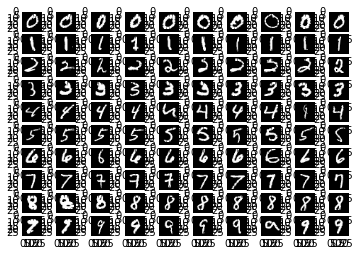

In [103]:
def P1(num_examples=10):
  digitStart = [0, 7000, 14000, 21000, 28000, 35000, 40000, 47000, 54000, 58000]

  fig, axes = plt.subplots(nrows=num_examples, ncols=num_examples)
  for row in range(0, num_examples):
    for column in range(0, num_examples):
      axes[row][column].imshow(X_Orig[digitStart[row] + column].reshape(28,28), cmap=cm.Greys_r)

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [12]:
def P2(k_values):
  for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(mini_train_data, mini_train_labels)
    predicted = [neigh.predict(i)[0] for i in dev_data]
    print("for k=" + str(k))
    print (classification_report(dev_labels, predicted))

k_values = [1, 3, 5, 7, 9]
P2(k_values)

for k=1
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

for k=3
             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95        99
        1.0       0.81      1.00      0.89       105
        2.0       0.95      0.81      0.88       102
        3.0       0.69      0.84      0.75        86
        4.0       0.88      0.85      0.86       104
        5.0       0.94    

ANSWER: 3 and 9 are the most difficult digit

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [19]:
def P3(train_sizes, accuracies):
  for train_data_size in train_sizes:
    # make train subset (take first train_data_size number of elements out of training data set)  
    train_subset = train_data[:train_data_size]
    labels = train_labels[:train_data_size]
    
    # build model (duration excluded from prediction time)
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(train_subset, labels)
    
    # As required, only measure time of prediction (instead of time of modeling)
    start = time.time()
    score = neigh.score(dev_data, dev_labels)
    accuracies.append(score)
    print("for training set size %d, accuracy %3.2f" % (train_data_size, score))
    end = time.time()
    print("takes %d seconds)" % (end - start))

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

for training set size 100, accuracy 0.72
takes 0 seconds)
for training set size 200, accuracy 0.79
takes 0 seconds)
for training set size 400, accuracy 0.84
takes 0 seconds)
for training set size 800, accuracy 0.88
takes 0 seconds)
for training set size 1600, accuracy 0.90
takes 1 seconds)
for training set size 3200, accuracy 0.93
takes 3 seconds)
for training set size 6400, accuracy 0.94
takes 6 seconds)
for training set size 12800, accuracy 0.96
takes 12 seconds)
for training set size 25000, accuracy 0.97
takes 26 seconds)


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

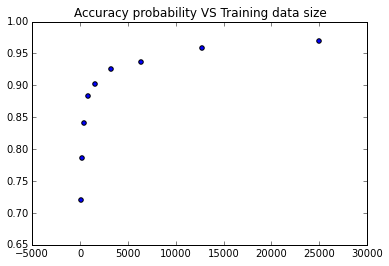

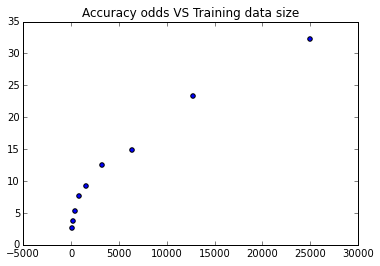

[ 0.98678522]


In [64]:
def P4():
  sizes = [[100], [200], [400], [800], [1600], [3200], [6400], [12800], [25000]]
  plot_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]

  # convert from probability to odds
  odds = [i / (1 - i) for i in accuracies]  

  plt.title("Accuracy probability VS Training data size")
  plt.scatter(plot_sizes, accuracies)
  plt.show()

  plt.title("Accuracy odds VS Training data size")
  plt.scatter(plot_sizes, odds)
  plt.show()

  regression = LinearRegression()  
    
  regression.fit(sizes, odds)

  odds = regression.predict(60000)
  # convert back from odds to probability
  prob = odds / (odds + 1)

  print (prob)
P4()

ANSWER: The relationship between training data size and accuracy probability does not look very linear and the prediction can go above 100%. By converting the probability to odds before fitting linear regression, I can make the relationship a lot more linear. Also by using odds, the probability once converted back will never go above 100%.

The predicted accuracy with training data size of 60000 is 0.98678522 

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  5   3  86   1   0   0   0   4   2   1]
 [  0   0   1  82   0   1   0   1   0   1]
 [  0   0   0   0  94   1   3   0   0   6]
 [  1   0   0   5   0  81   0   0   1   3]
 [  1   1   0   0   1   0  94   1   0   0]
 [  0   4   0   1   1   0   0 104   0   3]
 [  0   1   1   4   0   3   1   0  85   1]
 [  1   0   0   2   2   0   0   5   0  96]]
mismatched index:8, 3.0 mistaken to be 2.0
mismatched index:24, 9.0 mistaken to be 4.0
mismatched index:27, 8.0 mistaken to be 3.0
mismatched index:36, 2.0 mistaken to be 9.0
mismatched index:40, 6.0 mistaken to be 4.0
mismatched index:43, 0.0 mistaken to be 6.0
mismatched index:62, 7.0 mistaken to be 1.0
mismatched index:87, 5.0 mistaken to be 9.0
mismatched index:101, 9.0 mistaken to be 0.0
mismatched index:124, 8.0 mistaken to be 3.0
mismatched index:136, 5.0 mistaken to be 3.0
mismatched index:170, 8.0 mistaken to be 3.0
mismatched index:178, 4.0 mistaken to 

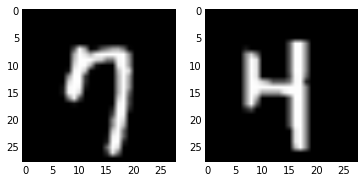

In [107]:
def P5():
  train_subset = train_data[:3000]
  labels = train_labels[:3000]
    
  neigh = KNeighborsClassifier(n_neighbors=1)
  neigh.fit(train_subset, labels)
    
  predicted = [neigh.predict(i)[0] for i in dev_data]
  print(confusion_matrix(dev_labels, predicted))
    
  for i in range(0, len(predicted)):
    if predicted[i] != dev_labels[i]:
      print ("mismatched index:%d, %s mistaken to be %s" % (i, dev_labels[i], predicted[i]))
    
  fig, axes = plt.subplots(nrows=1, ncols=2)
  print("Examples:7 is mistaken to be 9")
  axes[0].imshow(dev_data[210].reshape(28,28), cmap=cm.Greys_r)
  print("Examples:4 is mistaken to be 9")
  axes[1].imshow(dev_data[704].reshape(28,28), cmap=cm.Greys_r)
P5()

ANSWER: most confused pair of digits look like 9-4,9-7

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [108]:
def smooth(p):
  p_matrix = p.reshape(28,28)
  new_p = p_matrix.copy()
  for row in range(0, 28):
    for col in range(0, 28):
      counter = 0
      total = 0
      try:
        total += p_matrix[row - 1][col]
        counter += 1
      except IndexError:
        pass
        
      try:
        total += p_matrix[row - 1][col + 1]
        counter += 1
      except IndexError:
        pass

      try:
        total += p_matrix[row - 1][col - 1]
        counter += 1
      except IndexError:
        pass
    
      try:
        total += p_matrix[row + 1][col]
        counter += 1
      except IndexError:
        pass
    
      try:
        total += p_matrix[row + 1][col + 1]
        counter += 1
      except IndexError:
        pass
    
      try:
        total += p_matrix[row + 1][col - 1]
        counter += 1
      except IndexError:
        pass
    
      try:
        total += p_matrix[row][col - 1]
        counter += 1
      except IndexError:
        pass
    
      try:
        total += p_matrix[row][col + 1]
        counter += 1
      except IndexError:
        pass
    
      new_p[row][col] = total/counter
  
  return new_p.reshape(1, 28*28)[0]

def P6():
  neigh = KNeighborsClassifier(n_neighbors=1)
    
  # no preprocessing
  neigh.fit(train_data[:3000], train_labels[:3000])
  predicted = [neigh.predict(i)[0] for i in dev_data]
  print("no preprocessing")
  print (classification_report(dev_labels, predicted))

  # preprocess training data, but not dev data
  preprocessed_train_data = [smooth(i) for i in train_data[:3000]]
  neigh.fit(preprocessed_train_data, train_labels[:3000])
  predicted = [neigh.predict(i)[0] for i in dev_data]
  print("preprocess training data, but not dev data")
  print (classification_report(dev_labels, predicted))

  # preprocess dev data, but not training data
  preprocessed_dev_data = [smooth(i) for i in dev_data]
  neigh.fit(train_data[:3000], train_labels[:3000])
  predicted = [neigh.predict(i)[0] for i in preprocessed_dev_data]
  print("preprocess dev data, but not training data")
  print (classification_report(dev_labels, predicted))

  # preprocess both dev data and training data
  neigh.fit(preprocessed_train_data, train_labels[:3000])
  predicted = [neigh.predict(i)[0] for i in preprocessed_dev_data]
  print("preprocess both dev data and training data")
  print (classification_report(dev_labels, predicted))

P6()

no preprocessing
             precision    recall  f1-score   support

        0.0       0.92      0.98      0.95        99
        1.0       0.92      1.00      0.96       105
        2.0       0.98      0.84      0.91       102
        3.0       0.86      0.95      0.91        86
        4.0       0.96      0.90      0.93       104
        5.0       0.94      0.89      0.92        91
        6.0       0.94      0.96      0.95        98
        7.0       0.90      0.92      0.91       113
        8.0       0.97      0.89      0.92        96
        9.0       0.86      0.91      0.88       106

avg / total       0.93      0.92      0.92      1000

preprocess training data, but not dev data
             precision    recall  f1-score   support

        0.0       0.94      0.99      0.97        99
        1.0       0.99      1.00      1.00       105
        2.0       0.99      0.89      0.94       102
        3.0       0.91      0.94      0.93        86
        4.0       0.97      0.90   

ANSWER: preprocessing training data yielded better accuracy. preprocessing dev data without training data did not show any improvement ( expectedly ). I have also experimented with gausian filter ( as sigma value becomes bigger, the accuracy actually drops without improving )

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [109]:
def discretize(data):
  discreet_data = deepcopy(data)
  for sample in discreet_data:
    for i in range(len(sample)):
        if sample[i] > 0.66:
            sample[i] = 2
        elif sample[i] < 0.33:
            sample[i] = 0
        else:
            sample[i] = 1
  return discreet_data

def P7():
  nb = BernoulliNB(binarize=0.25)
  nb.fit(train_data, train_labels)
  predicted = [nb.predict(i)[0] for i in dev_data]
  print ("results from binary valued feasures")
  print (classification_report(dev_labels, predicted))

  discreet_train_data = discretize(train_data)
  discreet_dev_data = discretize(dev_data)
  mnb = MultinomialNB() 
  mnb.fit(discreet_train_data, train_labels)
  predicted = [mnb.predict(i)[0] for i in discreet_dev_data]
  print ("results from multi valued feasures")
  print (classification_report(dev_labels, predicted))
P7()

results from binary valued feasures
             precision    recall  f1-score   support

        0.0       0.93      0.98      0.96        99
        1.0       0.88      0.97      0.92       105
        2.0       0.82      0.76      0.79       102
        3.0       0.72      0.78      0.75        86
        4.0       0.86      0.83      0.84       104
        5.0       0.87      0.74      0.80        91
        6.0       0.90      0.86      0.88        98
        7.0       0.93      0.81      0.86       113
        8.0       0.82      0.83      0.82        96
        9.0       0.72      0.86      0.78       106

avg / total       0.85      0.84      0.84      1000

results from multi valued feasures
             precision    recall  f1-score   support

        0.0       0.92      0.97      0.95        99
        1.0       0.89      0.93      0.91       105
        2.0       0.86      0.78      0.82       102
        3.0       0.75      0.76      0.75        86
        4.0       0.87  

ANSWER: looking at the results, the multi-valued feature did not improve the precision of prediction. In the context of this problem, a pixel is either black or white. It would overfit the data by introducing more threshold

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [72]:
def P8(alphas):
  parameters = alphas
  nb = BernoulliNB(binarize=0.25)
  optimizedNb = GridSearchCV(nb, parameters) 
  optimizedNb.fit(train_data, train_labels)
  print ("results from optimized Bernoulli NB")
  print (optimizedNb.score(dev_data, dev_labels))

  unsmoothedNb = BernoulliNB(alpha=0,binarize=0.25)
  unsmoothedNb.fit(train_data, train_labels)
  print ("results from Bernoulli NB without smoothing")
  print (unsmoothedNb.score(dev_data, dev_labels))

  return optimizedNb
    
alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/naive_bayes.py:707: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/naive_bayes.py:707: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/naive_bayes.py:707: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/naive_bayes.py:707: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)


results from optimized Bernoulli NB
0.845
results from Bernoulli NB without smoothing
0.099


In [71]:
print (nb.best_params_)

{'alpha': 0.0001}


ANSWER: the best alpha is 0.0001. when alpha is 0, the precision is very low. this is expected because without smoothing, a lot of probability will be 0, and the multiplication of these probability will also be zero

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and theta\_.

In [69]:
def P9():
  nb = GaussianNB()
  nb.fit(train_data, train_labels)
  predicted = [nb.predict(i)[0] for i in dev_data]
  print ("results from GuassianNB")
  print (classification_report(dev_labels, predicted))

  train_data_1 = deepcopy(train_data)
  for i in range(0, len(train_data_1)):
    l = train_labels[i]
    
    # introduce more noise by increasing the variance
    r = np.random.normal(nb.theta_[l], 0.08 + nb.sigma_[l])
    for j in range(0, len(train_data_1[i])):
      train_data_1[i][j] += r[j]

  nb.fit(train_data_1, train_labels)
  predicted = [nb.predict(i)[0] for i in dev_data]
  print ("results from GuassianNB with guassian noise")
  print (classification_report(dev_labels, predicted))

gnb = P9()

results from GuassianNB
             precision    recall  f1-score   support

        0.0       0.73      0.97      0.83        99
        1.0       0.82      0.94      0.88       105
        2.0       0.90      0.25      0.40       102
        3.0       0.75      0.44      0.55        86
        4.0       0.86      0.23      0.36       104
        5.0       0.50      0.03      0.06        91
        6.0       0.67      0.94      0.78        98
        7.0       0.80      0.28      0.42       113
        8.0       0.33      0.70      0.45        96
        9.0       0.39      0.94      0.56       106

avg / total       0.68      0.58      0.53      1000

results from GuassianNB with guassian noise
             precision    recall  f1-score   support

        0.0       0.98      0.80      0.88        99
        1.0       0.81      0.97      0.88       105
        2.0       0.91      0.74      0.82       102
        3.0       0.89      0.59      0.71        86
        4.0       0.85     

ANSWER:I am adding guassian noise to the training data to improve the result. 1) make the training data close to guassian distribution 2) make the model generalize better by introducing more noise as I increase the variance of training data

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

In [113]:
def P10(num_examples):
  generated = []
  nb = BernoulliNB(binarize=0)
  nb.fit(train_data, train_labels)
  prob = np.exp(nb.feature_log_prob_)
    
  for e in range(0, num_examples):
    example = []
    generated.append(example)
    for i in range(0, 10):
      digit = np.empty(28*28)
      example.append(digit)
      for j in range(0, len(prob[i])):
        if np.random.rand() < prob[i][j]:
          digit[j] = 1
        else:
          digit[j] = 0

  fig, axes = plt.subplots(nrows=num_examples, ncols=10, figsize=(150,150))
  
  for row in range(0, num_examples):
    for column in range(0, 10):
      axes[row][column].imshow(generated[row][column].reshape(28,28), cmap=cm.Greys_r)

    
P10(20)

ANSWER:

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [114]:
def P11(buckets, correct, total):
  nb = BernoulliNB(binarize=0.25, alpha=0.0001)
  nb.fit(train_data, train_labels)
  predicted = [nb.predict_log_proba(i)[0] for i in dev_data]
  predicted = np.exp(predicted)

  for i in range(0, len(predicted)):
    # find max posterior
    max_posterior = max(predicted[i])
    
    # find the bucket it belongs to
    for j in range(0, len(buckets)):
      if buckets[j] > max_posterior:
        total[j] += 1
        if np.argmax(predicted[i]) == dev_labels[i]:
          correct[j] += 1
        break

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))


p(pred) <= 0.5000000000000    total =   1    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  33    accuracy = 0.545
p(pred) <= 0.9990000000000    total =  88    accuracy = 0.477
p(pred) <= 0.9999900000000    total =  71    accuracy = 0.507
p(pred) <= 0.9999999000000    total =  66    accuracy = 0.773
p(pred) <= 0.9999999990000    total =  54    accuracy = 0.741
p(pred) <= 0.9999999999900    total =  56    accuracy = 0.839
p(pred) <= 0.9999999999999    total =  61    accuracy = 0.869
p(pred) <= 1.0000000000000    total =  25    accuracy = 0.920


ANSWER: the naive bayes model is weakly calibrated

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [80]:
def averageRowsAndColumns(image):
    columns = {}
    rowSum = 0.0
    cols = []
    rows = []
    for i in range(0, len(image)):
        # process column
        c = i % 28
        if c not in columns:
            columns[c] = []
        columns[c].append(image[i])

        # process row
        if i != 0 and i % 28 == 0:
            rows.append(rowSum / 28.0)
            rowSum = 0
        rowSum += image[i]
    
    # add row average as additional features ( one feature per row )
    image = np.append(image, np.array(rows))
    image = np.append(image, np.array(rows))
    image = np.append(image, np.array(rows))
    image = np.append(image, np.array(rows))
    
    # add column average as additional features ( one feature per column )
    for c in columns:
        cols.append(sum(columns[c]))
    image = np.append(image, np.array(rows))
    image = np.append(image, np.array(rows))
    image = np.append(image, np.array(rows))
    image = np.append(image, np.array(rows))
    return image

def P12():
    
    # preprocess both train data and dev data
    # to add average pixel value per column/row
    # as additional feature
    train_data_processed = [averageRowsAndColumns(i) for i in train_data]
    dev_data_processed = [averageRowsAndColumns(i) for i in dev_data]
    
    nb = BernoulliNB(binarize=0.03, alpha=0.0001)
    nb.fit(train_data_processed, train_labels)
    predicted = [nb.predict(i)[0] for i in dev_data_processed]
    print ("results from improved NB")
    print (classification_report(dev_labels, predicted))

P12()

results from improved NB
             precision    recall  f1-score   support

        0.0       0.91      0.97      0.94        99
        1.0       0.93      0.98      0.95       105
        2.0       0.84      0.75      0.79       102
        3.0       0.65      0.72      0.69        86
        4.0       0.92      0.80      0.86       104
        5.0       0.90      0.60      0.72        91
        6.0       0.88      0.94      0.91        98
        7.0       0.86      0.82      0.84       113
        8.0       0.75      0.83      0.79        96
        9.0       0.69      0.82      0.75       106

avg / total       0.84      0.83      0.83      1000

